In [ ]:
from google.colab import files

x = files.upload()

Saving Dataset.zip to Dataset.zip


In [ ]:

! ls -hl
! unzip Dataset.zip


**Image preprocessing using Pillow and Matplotlib**

In [ ]:
import PIL
print('Pillow Version:', PIL.__version__)

Pillow Version: 7.1.2


In [ ]:
from PIL import Image
# load the image
image = Image.open('Dataset/incorrectly held/incorrect (34).jpg')

In [ ]:
print(image.format)
print(image.mode)
print(image.size)

JPEG
RGB
(318, 159)


(159, 318, 3)


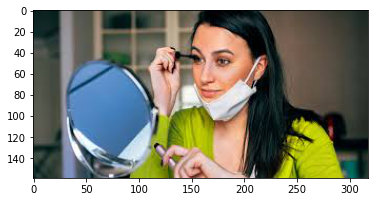

In [ ]:
# Load one image
from matplotlib.pyplot import imshow
import numpy as np
%matplotlib inline

print(np.asarray(image).shape)
imshow(np.asarray(image))

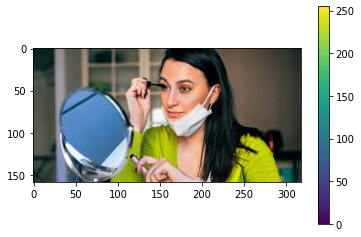

In [ ]:
# Show color bar
import matplotlib.pyplot as plt
image = Image.open('Dataset/incorrectly held/incorrect (34).jpg')

plt.imshow(np.asarray(image))
plt.colorbar()

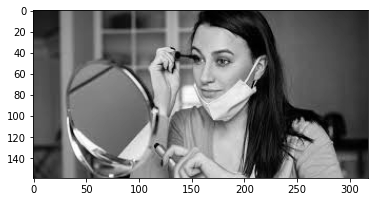

In [ ]:
# Convert to grayscale
image = Image.open('Dataset/incorrectly held/incorrect (34).jpg')

gs_image = image.convert(mode='L')
imshow(np.asarray(gs_image), cmap='gray')

(100, 50)


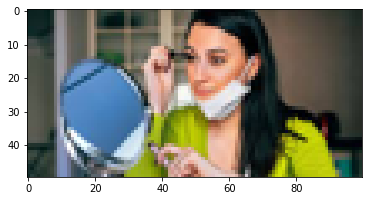

In [ ]:
# Create a thumbnail and "preserve aspect ratio"

image = Image.open('Dataset/incorrectly held/incorrect (34).jpg')
image.thumbnail((100,100))
print(image.size)
imshow(np.asarray(image))

(200, 200)


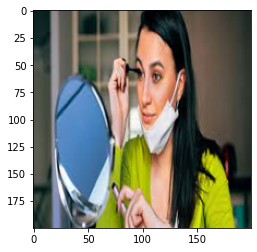

In [ ]:
# Resize and "ignore original aspect ratio"
image = Image.open('Dataset/incorrectly held/incorrect (34).jpg')
img_resized = image.resize((200,200))
print(img_resized.size)
imshow(np.asarray(img_resized))

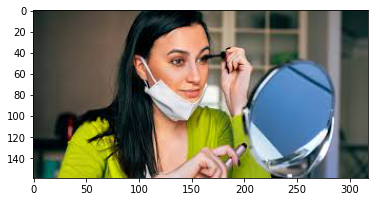

In [ ]:
# Horizontal flip
image = Image.open('Dataset/incorrectly held/incorrect (34).jpg')
imshow(image.transpose(Image.FLIP_LEFT_RIGHT))


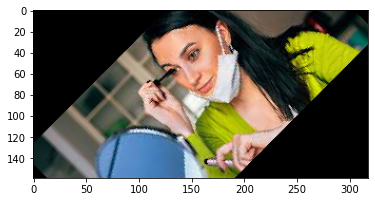

In [ ]:
image = Image.open('Dataset/incorrectly held/incorrect (34).jpg')
imshow(image.rotate(45))


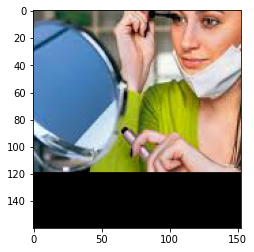

In [ ]:
image = Image.open('Dataset/incorrectly held/incorrect (34).jpg')

cropped = image.crop((50, 40 , 203, 200))
imshow(cropped)

In [ ]:
#Load all images in a directory
from os import listdir
from matplotlib import image

loaded_images = list()
for filename in listdir('Dataset/incorrectly held/'):
	img_data = image.imread('Dataset/incorrectly held/' + filename)
	loaded_images.append(img_data)
	print('> loaded %s %s' % (filename, img_data.shape))

**Building my own image generator using ImageDataGenerator**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Rescale all images by 1./255
my_generator = ImageDataGenerator(rescale=1./255)

In [ ]:
# Specify how the ImageDataGenerator will read and deliver
my_image_generator = my_generator.flow_from_directory( './Dataset/', target_size=(250, 250), batch_size=5, class_mode='categorical')
# For more than 2 classes change to "categorical"

Found 789 images belonging to 3 classes.


**Visualizing 5 sample images from dataset.**


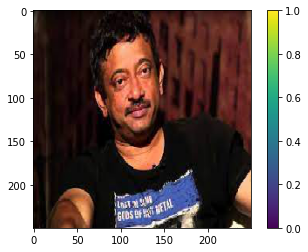

[0. 0. 1.]


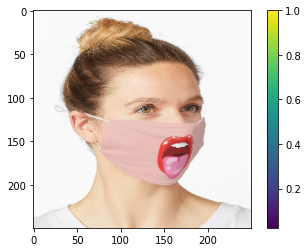

[0. 1. 0.]


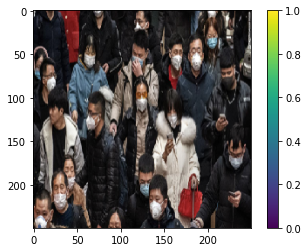

[0. 1. 0.]


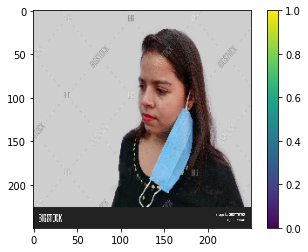

[1. 0. 0.]


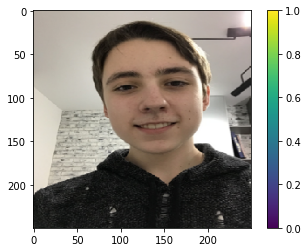

[0. 0. 1.]


In [ ]:
t=0;
for my_batch in my_image_generator:

  t=t+1 
  images = my_batch[0]
  labels = my_batch[1]
  for i in range(len(labels)):
    # Gives one image and its corresponding label
    plt.imshow(images[i])
    plt.colorbar()
    plt.show()
    print(labels[i])
  break


**Output labels used:**

[1.,0.,0.] -> **Face mask worn incorrectly**

[0.,1.,0.] -> **human with face mask on**
 
[0.,0.,1.] -> **human with no facemask on** 

**Image augmentation using ImageDataGenerator**

In [ ]:
my_augmented_generator = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rescale=1./255,
    fill_mode='nearest')

In [ ]:
my_augmented_image_generator = my_augmented_generator.flow_from_directory( './Dataset/', target_size=(150, 150), batch_size=5, class_mode='categorical')

Found 789 images belonging to 3 classes.


**Sample output after performing Image augmentation**

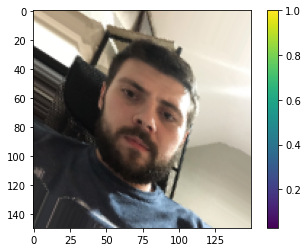

[0. 0. 1.]


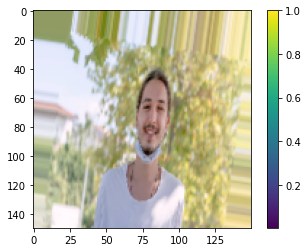

[1. 0. 0.]


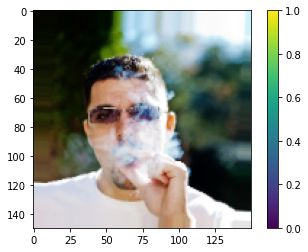

[0. 0. 1.]


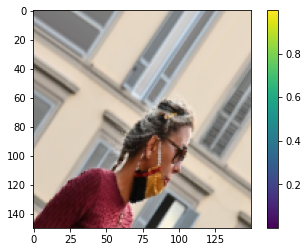

[1. 0. 0.]


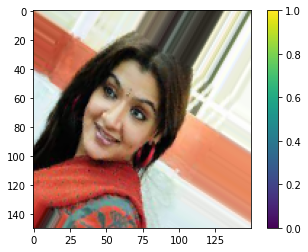

[0. 0. 1.]


In [ ]:
for my_batch in my_augmented_image_generator:
    # my_batch is a tuple with images and labels
    images = my_batch[0]
    labels = my_batch[1]
    for i in range(len(labels)):
        # Gives one image and its corresponding label
        plt.imshow(images[i])
        plt.colorbar()
        plt.show()
        print(labels[i])
    break

In [ ]:
for my_batch in my_image_generator:
    # my_batch is a tuple with images and labels
    images = my_batch[0]
    labels = my_batch[1]
    print(len(labels))
    break
    

789


In [ ]:
import numpy
incorrect = 0
correct = 0
no=0

for i in labels:
  if (i[0]==1.):
    incorrect = incorrect+1;
  elif i[1] == 1.:
    correct = correct+1
  else:
    no = no+1

**Distribution of Output Labels**

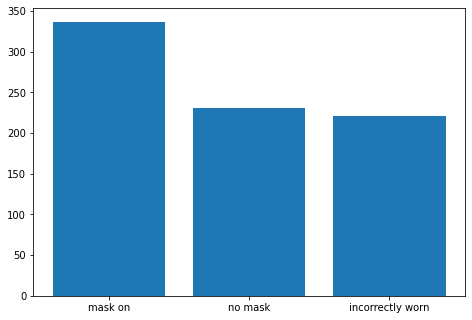

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['mask on', 'no mask', 'incorrectly worn']
students = [correct,no,incorrect,]
ax.bar(langs,students)
plt.show()